In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
null_values = data.isnull()

total_null_values = null_values.sum()

print(f"Total number of null values: {total_null_values}")

Total number of null values: RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [8]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [9]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

In [11]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
pd.get_dummies(data)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [14]:
data = pd.get_dummies (data,drop_first=True)


In [15]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [16]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='count'>

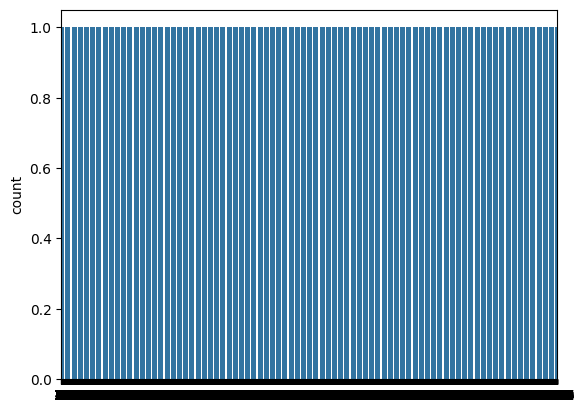

In [17]:
sns.countplot(data['Exited'])

In [18]:
x = data.drop('Exited', axis = 1)
y = data['Exited']

In [19]:
from imblearn.over_sampling import SMOTE     #handling imbalanced data with smote

In [20]:
x_res, y_res = SMOTE().fit_resample(x,y)

In [21]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.20, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler            # Feature Scalling

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
x_train

array([[ 0.61996633,  1.81189391, -0.65732699, ..., -0.76367448,
        -0.62929436,  0.80877427],
       [ 1.10407132,  0.10398246, -1.39266051, ..., -0.76367448,
        -0.62929436,  0.80877427],
       [ 1.4451453 ,  1.4100324 , -0.65732699, ..., -0.76367448,
        -0.62929436, -1.23643894],
       ...,
       [ 0.20187565,  0.20444784,  1.18100682, ..., -0.76367448,
        -0.62929436,  0.80877427],
       [-1.77855387,  1.91235929,  0.07800654, ...,  1.30945845,
        -0.62929436, -1.23643894],
       [ 0.53194724,  1.00817088, -1.39266051, ...,  1.30945845,
        -0.62929436,  0.80877427]])

In [25]:
from sklearn.linear_model import   LogisticRegression      # Logistic Regression

log = LogisticRegression()

log.fit(x_train, y_train)

LogisticRegression()

In [26]:
y_predl = log.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, y_predl)

0.775894538606403

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [30]:
precision_score(y_test, y_predl)

0.7697749196141479

In [31]:
recall_score(y_test, y_predl)

0.7707662588538313

In [32]:
f1_score(y_test, y_predl)

0.7702702702702703

In [33]:
from sklearn import svm      # SVM
svm = svm.SVC()
svm.fit(x_train, y_train)

SVC()

In [34]:
y_pred2 = svm.predict(x_test)

In [35]:
accuracy_score(y_test, y_pred2)

0.8421217827997489

In [36]:
precision_score(y_test, y_pred2)

0.8435863874345549

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred3 = knn.predict(x_test)

In [39]:
accuracy_score(y_test, y_pred3)

0.8192090395480226

In [40]:
precision_score(y_test, y_pred3)

0.8028518288902666

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred4 = dt.predict(x_test)

In [43]:
accuracy_score(y_test, y_pred4)

0.8022598870056498

In [44]:
precision_score(y_test, y_pred4)

0.7819181429444105

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
y_pred5 = rf.predict(x_test)

In [47]:
accuracy_score(y_test, y_pred5)

0.8684871311989956

In [48]:
precision_score(y_test, y_pred5)

0.8643958868894601

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [50]:
y_pred6 = gb.predict(x_test)

In [51]:
accuracy_score(y_test, y_pred6)

0.8480853735091023

In [52]:
precision_score(y_test, y_pred6)

0.8446163765312702

In [53]:
final_data = pd.DataFrame({'Models':['LR','SVC', 'KNN', 'DT', 'RF', 'GBC'],
                          'ACC':[accuracy_score(y_test,y_predl),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]})

In [54]:
final_data

,Models,ACC
0,LR,0.775895
1,SVC,0.842122
2,KNN,0.819209
3,DT,0.802260
4,RF,0.868487
5,GBC,0.848085


In [55]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

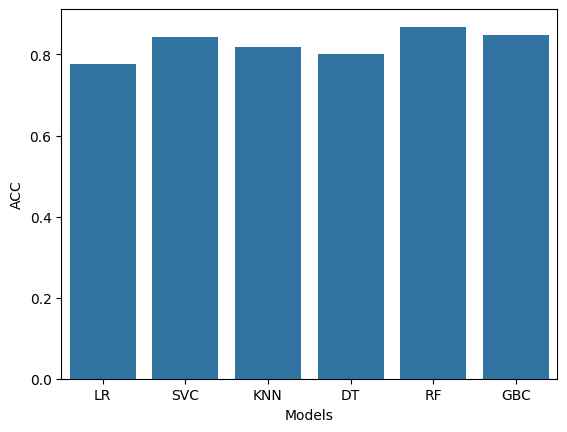

In [56]:
# Create a bar plot with correct arguments
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

In [57]:
final_data = pd.DataFrame({'Models':['LR','SVC', 'KNN', 'DT', 'RF', 'GBC'],
                          'PRE':[precision_score(y_test,y_predl),
                                precision_score(y_test,y_pred2),
                                precision_score(y_test,y_pred3),
                                precision_score(y_test,y_pred4),
                                precision_score(y_test,y_pred5),
                                precision_score(y_test,y_pred6)]})

In [58]:
final_data

,Models,PRE
0,LR,0.769775
1,SVC,0.843586
2,KNN,0.802852
3,DT,0.781918
4,RF,0.864396
5,GBC,0.844616


<Axes: xlabel='Models', ylabel='PRE'>

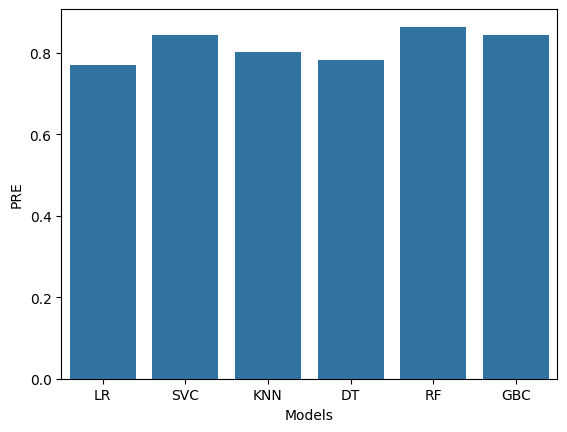

In [59]:
sns.barplot(x=final_data['Models'], y=final_data['PRE'])

In [60]:
x_res = sc.fit_transform(x_res)

In [61]:
rf.fit(x_res,y_res)

RandomForestClassifier()

In [62]:
import joblib

In [63]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [64]:
model = joblib.load('churn_predict_model')

In [65]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [66]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [67]:
model.predict([[619,42,2,0.00,1,1,1,101348.88,1,0,0]])


array([0])

In [5]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib
sc = StandardScaler()

In [6]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = float(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = float(e8.get())
    p9 = int(e9.get())
    if p9 == 1:
      Geography_Germany = 1
      Geography_spain = 0
      Geography_France = 0
    elif p9 == 2:
      Geography_Germany = 0
      Geography_spain = 1
      Geography_France = 0
    elif p9 == 3:
      Geography_Germany = 0
      Geography_spain = 0
      Geography_France = 1
    p10 = int(e10.get())
    model = joblib.load('churn_model')
    result = model.predict(sc.transform([[p1,p2,p3,p4,p5,p6,p7,p8,Geography_Germany,Geography_Spain,p10]]))
    if result ==0:
      Label(master, text = "No Exit").grid(row = 31)
    else:
      Label(master, text = "Exit").grid(row = 31)
master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")

label = Label(master, text = "customer Churn Prediction Using Machine Learning",
                            bg = "black", fg = "white"). \
                                grid(row = 0, columnspan = 2)

Label(master, text = "creditScore").grid(row = 1)
Label(master, text = "Age").grid(row = 2)
Label(master, text = "Tenure").grid(row = 3)
Label(master, text = "Balance").grid(row = 4)
Label(master, text = "NumOfProducts").grid(row = 5)
Label(master, text = "HasCrCard").grid(row = 6)
Label(master, text = "IsActiveMember").grid(row = 7)
Label(master, text = "estimatedSalary").grid(row = 8)
Label(master, text = "GeoGraphy").grid(row = 9)
Label(master, text = "Gender").grid(row = 10)


e1.grid(row = 1, column = 1)
e2.grid(row = 2, column = 1)
e3.grid(row = 3, column = 1)
e4.grid(row = 4, column = 1)
e5.grid(row = 5, column = 1)
e6.grid(row = 6, column = 1)
e7.grid(row = 7, column = 1)
e8.grid(row = 8, column = 1)
e9.grid(row = 9, column = 1)
e10.grid(row = 10, column = 1)

Button(master, text = "predict", command = show_entry_fields).grid()

mainloop()










TclError: no display name and no $DISPLAY environment variable

In [ ]:
export DISPLAY=:0